<a href="https://colab.research.google.com/github/envgp/taking_the_pulse_of_the_planet/blob/main/notebooks/pulse_course_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Green House Gases

Rosemary Knight (rknight@stanford.edu) & Seogi Kang (sgkang09@stanford.edu), Stanford Environmental Geophysics Group

In this assignment, we will explore green houses gases including CO2, CH4 as well as other trace gases including NO2 and CO in the atmospheric system, which drives the climate change. Data sets used this assignment are: 
- CO2 - one time-series at one location
- Gridded data - CO2 in space and time (time-series at many locations)
- Gridded data - CH4 in space and time (time-series at many locations)
- Gridded data - NO2 in space and time (time-series at many locations)
- Gridded data - CO in space and time (time-series at many locations)

This lab is supposed be submitted by `2023-1-24`. You are supposed to put your answer questions within this notebook and share the completed notebook with sgkang09@stanford.edu using the `Share` banner located at the top right corner of this notebook. When sharing your notebook, please change the name of the notebook and add your name and sunetid (e.g., `purse_course_assignment_1_firstname_lastname_sunetid.ipynb`)

This is the first assignment of the course, and we will use this and the next assignment to introduce core tools inluding Goolge Colab (similar to Jupyter Notebook) and Python packages that we are going to use throughout the course. The list of core Python packages are 

1. `numpy`: for calculating  mathematical functions
2. `matplotlib`: for visualization
3. `pandas`: for handling data in a table form
4. `xarray`: for handling gridded data 
5. `cartopy`: for visualizing gridded data on to a 2D map
6. `ipywidgets`: for creating interactive apps (exploration of data)
7. `geopandas`: for handling geographic data (e.g., country boundaries)

## Install required packages

In [2]:
!pip install xarray numpy pandas geopandas cartopy==0.19.0.post1 ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.5 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp38-cp38-linux_x86_64.whl size=12659546 sha256=b71bfb831efe95757737baf4bba883eee917c0ac2cc9c579058e3469a495d204
  Stored in directory: /root/.cache/pip/wheels/d7/7e/a7/f1de106b1da02e78db1fc6ff482fda367f8902856faa85d1c6
Successf

In [3]:
!pip uninstall -y shapely

Found existing installation: shapely 2.0.0
Uninstalling shapely-2.0.0:
  Successfully uninstalled shapely-2.0.0


In [4]:
!pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.5/274.5 KB 12.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/61/76/6e635cc4ba33e8c170ef5934dad5c269dc5cb9607e878efb2aba12f78361/shapely-2.0.0.tar.gz#sha256=11f1b1231a6c04213fb1226c6968d1b1b3b369ec42d1e9655066af87631860ea (from https://pypi.org/simple/shapely/) (requires-python:>=3.7): Requested unknown from https://files.pythonhosted.org/packages/61/76/6e635cc4ba33e8c170ef5934dad5c269dc5cb9607e878efb2aba12f78361/shapely-2.0.0.tar.gz#sha256=11f1b1231a6c04213fb1226c6968d1b1b3b369ec42d1e9655066af87631860ea has inconsistent name: filename has 'shapely', but metadata has 'unknown'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 KB 18.2 MB/s 

## Download required data

In [5]:
!git clone https://premonition.stanford.edu/sgkang09/taking_the_pulse_atmosphere_data.git

Cloning into 'taking_the_pulse_atmosphere_data'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 33 (delta 9), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (11/11), done.


## Import some Python packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Working with CO2 data - one time-series at one location in a table format using `pandas`

Let's start with a monthly time-series of CO2 level measured at Mauna Loa Observatory. We are going to read the CO2 level in a csv format using `pandas`. 

In [2]:
import pandas as pd

In [3]:
df_co2 = pd.read_csv('./taking_the_pulse_atmosphere_data/co2_gml.csv')

In [4]:
df_co2.head(2)

,year,month,monthly_average_co2,de-seasonalized_co2
0,1958.0,3.0,315.70,314.43
1,1958.0,4.0,317.45,315.16


In [5]:
df_co2.tail(3)

,year,month,monthly_average_co2,de-seasonalized_co2
774,2022.0,9.0,415.95,419.50
775,2022.0,10.0,415.78,419.14
776,2022.0,11.0,417.51,419.53


Access data in pandas dataframe.

In [6]:
import datetime
# generate DatetimeIndex from years and months
years = df_co2['year'].values.astype(int)
months = df_co2['month'].values.astype(int)
times = [datetime.date(years[ii], months[ii], 1) for ii in range(df_co2.shape[0])]
time_series = pd.to_datetime(times)
df_co2['time'] = time_series
df_co2 = df_co2.set_index('time')

Explain the above cell line-by-line

- numpy array
- list comprehension
- `datetime.date`
- `pd.to_datetime`
- ...

> **_NOTE:_**  useful keyboard shortcuts:
- running a cell: `shift + enter`
- auto completion: `control + space` on windows or `command + space` on mac



So now we are ready to plot the CO2 time-series. Let's plot them using `pandas`.

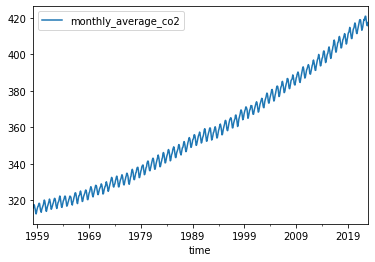

In [7]:
df_co2.plot(y='monthly_average_co2')

We could fine-tune the plot using `matplotlib`.

In [8]:
import matplotlib.pyplot as plt

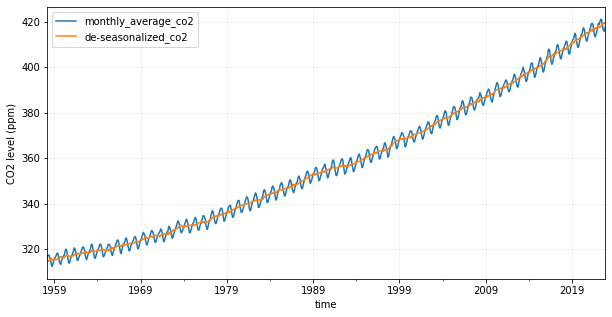

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
df_co2.plot(y='monthly_average_co2', ax=ax)
df_co2.plot(y='de-seasonalized_co2', ax=ax)
ax.grid(True, alpha=0.2)
ax.set_ylabel("CO2 level (ppm)")
ax.legend()

Suppose you just want select the data between 1960 and 1980, and plot them up, how could you do this? Let's use `numpy`. 

In [10]:
import numpy as np

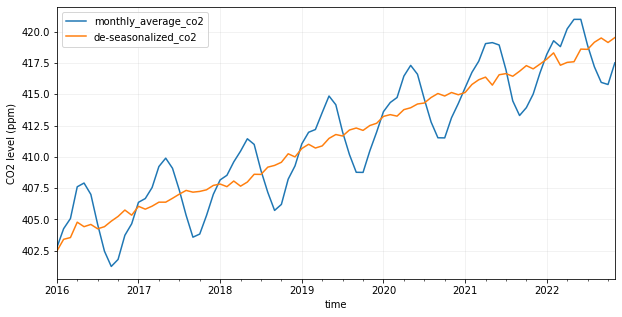

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
year_min = 2015
year_max = 2022
# find indicies between 1960 and 1980
index_time = np.logical_and(year_min<time_series.year, year_max>=time_series.year)
df_co2.loc[time_series[index_time]].plot(y='monthly_average_co2', ax=ax)
df_co2.loc[time_series[index_time]].plot(y='de-seasonalized_co2', ax=ax)
ax.grid(True, alpha=0.2)
ax.set_ylabel("CO2 level (ppm)")
ax.legend()

Although the table includes `de-seasonalized_co2`, as an exercise we are going to remove seasonal changes by using a moving average. 

In [15]:
moving_average_window_size = 12
df_series = df_co2['monthly_average_co2'].rolling(window=moving_average_window_size, center=True).mean()

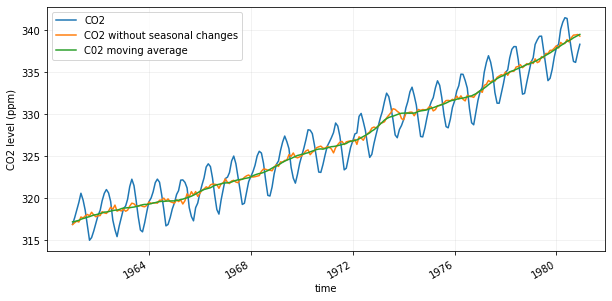

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
year_min = 1960
year_max = 1980
index_time = np.logical_and(year_min<time_series.year, year_max>=time_series.year)
ax.plot(time_series[index_time], df_co2['monthly_average_co2'].values[index_time], label="CO2", marker='None')
ax.plot(time_series[index_time], df_co2['de-seasonalized_co2'].values[index_time], label="CO2 without seasonal changes", marker='None')
df_series.loc[time_series[index_time]].plot(label='C02 moving average')
ax.grid(True, alpha=0.2)
ax.set_ylabel("CO2 level (ppm)")

ax.legend()

You could also estimate a linear trend using linear regression. 

In [18]:
def linear_fit(time_series, data):
    # assume the time series has a regular sampling rate
    times = np.arange(len(time_series))
    G = np.c_[times, np.ones_like(times)]
    Pinv = np.linalg.pinv(G)
    m = Pinv.dot(data)
    predicted_data = G @ m
    slope = m[0,:]
    intercept = m[1,:]
    return predicted_data, slope, intercept

In [19]:
predicted_data, slope, intercept = linear_fit(time_series[index_time], df_co2['monthly_average_co2'].values[index_time].reshape([-1,1]))

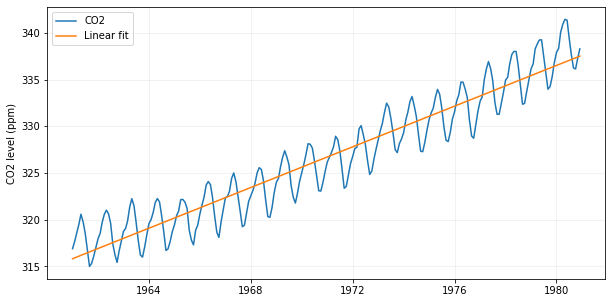

In [20]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.plot(time_series[index_time], df_co2['monthly_average_co2'].values[index_time], label="CO2", marker='None')
ax.plot(time_series[index_time], predicted_data, label="Linear fit", marker='None')
ax.grid(True, alpha=0.2)
ax.set_ylabel("CO2 level (ppm)")
ax.legend()

Let's add the linear trend back to the dataframe?

In [21]:
# Estimate the linear trend for all times
predicted_data, _, _ = linear_fit(time_series[:], df_co2['monthly_average_co2'].values[:].reshape([-1,1]))
df_co2['linear_trend_co2'] = predicted_data

In [23]:
df_co2.head(3)

,year,month,monthly_average_co2,de-seasonalized_co2,linear_trend_co2
time,,,,,
1958-03-01,1958.0,3.0,315.70,314.43,305.468965
1958-04-01,1958.0,4.0,317.45,315.16,305.603486
1958-05-01,1958.0,5.0,317.51,314.71,305.738008


The data is monthly, how do we transform these montlhy data into annual data? We are going to use `groupby` operation available through pandas dataframe. 

In [24]:
df_co2_annual = df_co2.groupby('year')['monthly_average_co2'].mean()

In [25]:
df_co2_annual.head(3)

year
1958.0    315.232000
1959.0    315.980833
1960.0    316.910000
Name: monthly_average_co2, dtype: float64

Text(0, 0.5, 'CO2 level (ppm)')

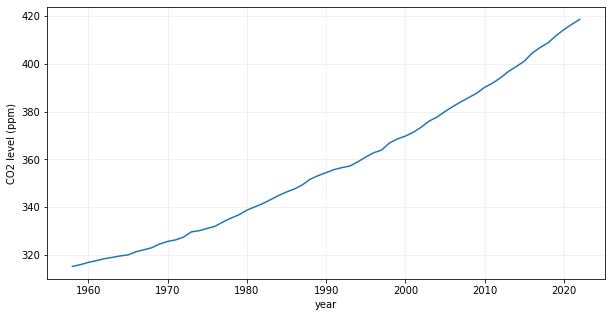

In [28]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
df_co2_annual.plot(legend=False, ax=ax)
ax.grid(True, alpha=0.2)
ax.set_ylabel("CO2 level (ppm)")

In [167]:
import xarray as xr

In [168]:
co2_data = xr.load_dataset('./taking_the_pulse_atmosphere_data/co2.nc')

Provide a nice summary of data structure. 

In [169]:
co2_data

<xarray.Dataset>
Dimensions:  (time: 84, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2021-12-31
  * lon      (lon) float64 -179.8 -178.8 -177.8 -176.8 ... 177.2 178.2 179.2
  * lat      (lat) float64 89.75 88.75 87.75 86.75 ... -87.25 -88.25 -89.25
Data variables:
    co2      (time, lat, lon) float64 400.6 400.6 400.6 ... 411.5 411.5 411.5
Attributes:
    Description:    CO2 data
    Unit:           ppmv (part per million per volume)
    Data document:  https://disc.gsfc.nasa.gov/datasets/OCO2_GEOS_L3CO2_MONTH...

Let's get some information about the data. 

- Time range
- Temporal resolution 
- ... 

In [170]:
co2_data.time.min()

<xarray.DataArray 'time' ()>
array('2015-01-31T00:00:00.000000000', dtype='datetime64[ns]')

In [171]:
co2_data.time.max()

<xarray.DataArray 'time' ()>
array('2021-12-31T00:00:00.000000000', dtype='datetime64[ns]')

In [172]:
co2_data.lon

<xarray.DataArray 'lon' (lon: 360)>
array([-179.75, -178.75, -177.75, ...,  177.25,  178.25,  179.25])
Coordinates:
  * lon      (lon) float64 -179.8 -178.8 -177.8 -176.8 ... 177.2 178.2 179.2

How do you access the data?

In [173]:
# demo - use co2 

Can we plot select a time slice of the data and plot a 2D map using `xarray`?

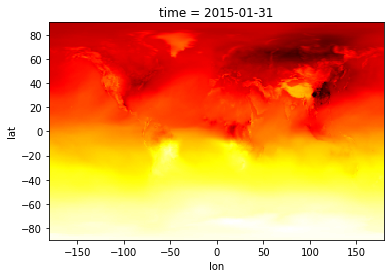

In [174]:
i_time = 0
co2_data.co2.isel(time=i_time).plot(add_colorbar=False, cmap='hot_r')

### Introducing cartopy

2D maps look cool, but it would be helpful if we could see continetal boundaries. 

In [131]:
import cartopy.crs as ccrs
import cartopy.feature as cf

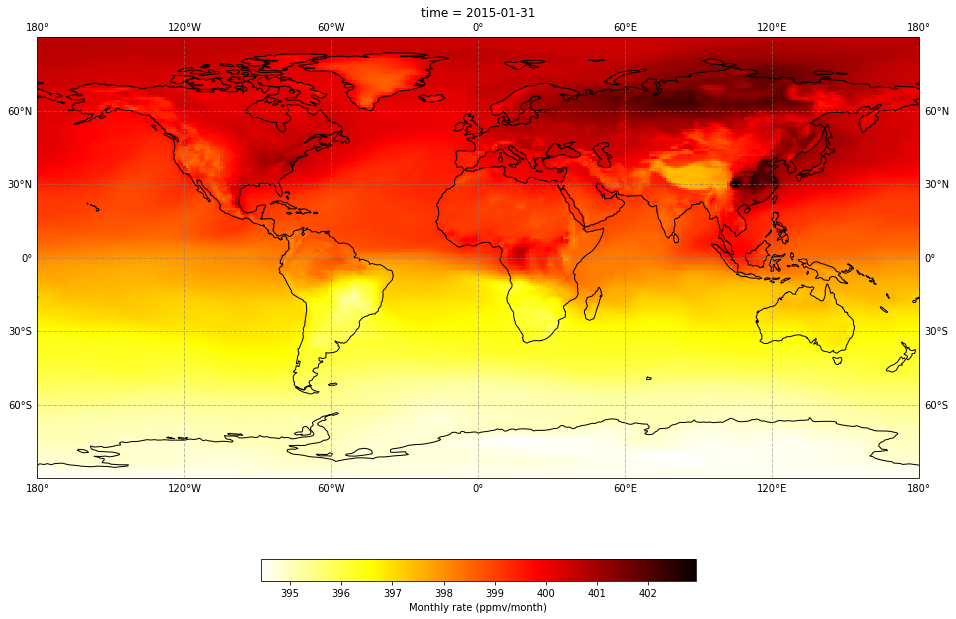

In [132]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.axes.add_feature(cf.COASTLINE)
out = co2_data.co2.isel(time=i_time).plot(add_colorbar=False, cmap='hot_r')
cb = plt.colorbar(out, fraction=0.04, orientation='horizontal')
cb.set_label("Monthly rate (ppmv/month)")
ax.set_aspect(1)

gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=1, 
    color='gray', 
    alpha=0.5, 
    linestyle='--'
)

Or you could also input a date. 

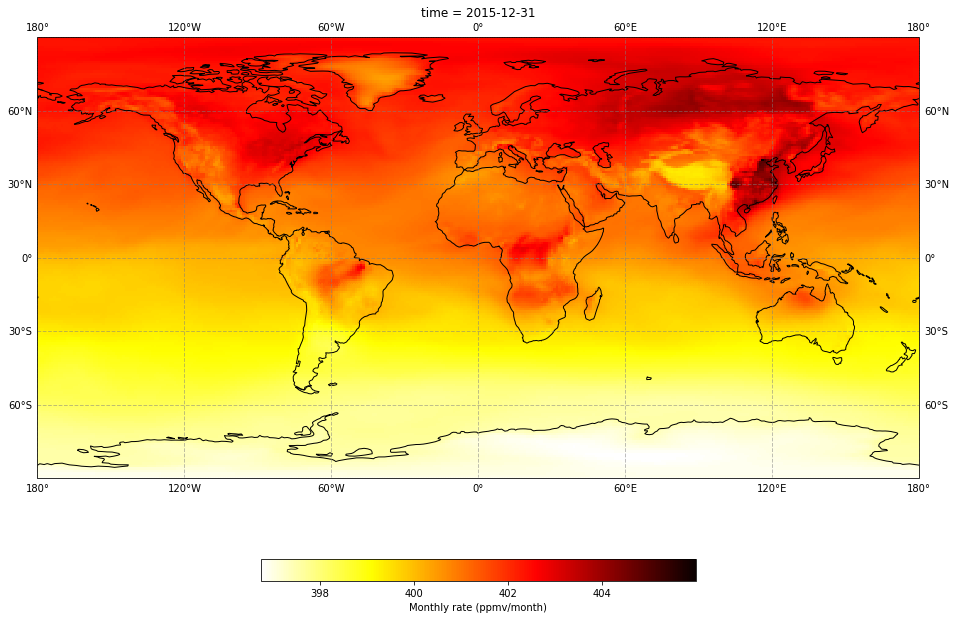

In [136]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.axes.add_feature(cf.COASTLINE)

time = '2016-1-10'
out = co2_data.co2.sel(time=time, method='nearest').plot(add_colorbar=False, cmap='hot_r', ax=ax)
cb = plt.colorbar(out, fraction=0.04, orientation='horizontal')
cb.set_label("Monthly rate (ppmv/month)")
ax.set_aspect(1)

gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=1, 
    color='gray', 
    alpha=0.5, 
    linestyle='--'
)

We could also select multiple times. Let's say we want all data between 2020-01 and 2021-12. Then we could first find corresponding indices of `time_series_co2` then input them. 

In [175]:
time_series_co2 = pd.to_datetime(co2_data.time.data)
index_tmp = np.logical_and(time_series_co2.year>=2015, time_series_co2.year<=2019)
co2_data_tmp = co2_data.sel(time=time_series_co2[index_tmp])
co2_data_tmp

<xarray.Dataset>
Dimensions:  (time: 60, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2019-12-31
  * lon      (lon) float64 -179.8 -178.8 -177.8 -176.8 ... 177.2 178.2 179.2
  * lat      (lat) float64 89.75 88.75 87.75 86.75 ... -87.25 -88.25 -89.25
Data variables:
    co2      (time, lat, lon) float64 400.6 400.6 400.6 ... 407.1 407.1 407.1
Attributes:
    Description:    CO2 data
    Unit:           ppmv (part per million per volume)
    Data document:  https://disc.gsfc.nasa.gov/datasets/OCO2_GEOS_L3CO2_MONTH...

Access all the CO2 data and plot them in a histogram. 

Text(0.5, 0, 'CO2 level (ppm)')

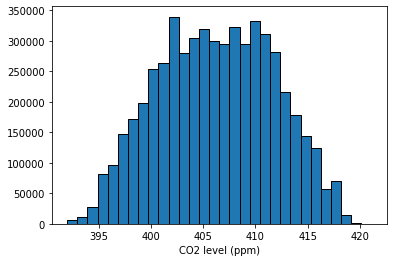

In [176]:
out = plt.hist(co2_data.co2.data.flatten(), bins=30, edgecolor='k')
#average of oco2 and manuloa ... 
plt.xlabel("CO2 level (ppm)")

We could go even more. Let's make an interactive plot. 

In [177]:
from ipywidgets import widgets, interact
def plot_co2(i_time):
    fig = plt.figure(figsize=(20, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.axes.add_feature(cf.COASTLINE)

    time = '2016-1-10'
    out = co2_data.co2.isel(time=i_time).plot(
        add_colorbar=False, cmap='hot_r', ax=ax,
        vmin=390, vmax=420
      )
    cb = plt.colorbar(out, fraction=0.04, orientation='horizontal')
    cb.set_label("Monthly rate (ppmv/month)")
    ax.set_aspect(1)
    ax.set_aspect(1)
    plt.show()

Think about how the plot would change with time? Before you run below cell, and toggle the time slider through. 

In [178]:
interact(plot_co2, i_time = widgets.IntSlider(min=0, max=83, step=12))

interactive(children=(IntSlider(value=0, description='i_time', max=83, step=12), Output()), _dom_classes=('wid…

<function __main__.plot_co2(i_time)>

We can do many more things using `xarray`. Let's calculate the mean CO2 values along the axis of Latitude and Longitude. Then plot the resulting time-series. 

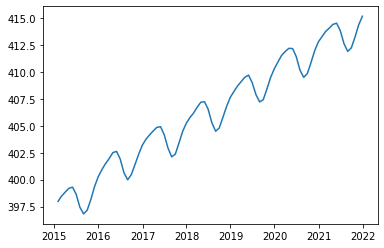

In [180]:
co2_mean_time_series = co2_data.mean(dim=['lat','lon'])
# below does not work..., unfortunately
# co2_mean_time_series.plot()
plt.plot(co2_mean_time_series.time, co2_mean_time_series.co2.data)

Or we could calculate the mean along the axis of Longitude (often greater variation in Latitudinal direction), and plot profiles of CO2 at different times. 

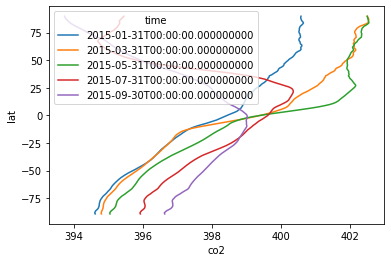

In [182]:
co2_lat = co2_data.mean(dim=['lon'])
# use the same date
out = co2_lat['co2'].isel(time=[0, 2, 4, 6, 8]).plot.line(y='lat', hue='time', add_legend=True)

Now we are going to calculate the linear trend every grid point in space. 

In [247]:
# Get co2 data as a numpy array, then reshape
co2_vec = co2_data.co2.data.reshape((co2_data.co2.data.shape[0], np.prod(co2_data.co2.data.shape[1:])))
time_series_co2 = pd.to_datetime(co2_data.time.data)
co2_linear_fit, slope, intercept = linear_fit(time_series_co2, co2_vec)

# Add resutls back to co2_data
co2_data['slope'] = (("lat", "lon"), slope.reshape(co2_data.co2.data.shape[1:]))
co2_data['intercept'] = (("lat", "lon"), intercept.reshape(co2_data.co2.data.shape[1:]))
co2_data['co2_linear_fit'] = (("time", "lat", "lon"), co2_linear_fit.reshape(co2_data.co2.data.shape))

time_min = pd.to_datetime(time_series_co2).min().strftime('%Y-%m')
time_max = pd.to_datetime(time_series_co2).max().strftime('%Y-%m')

Then plot the trend map. 

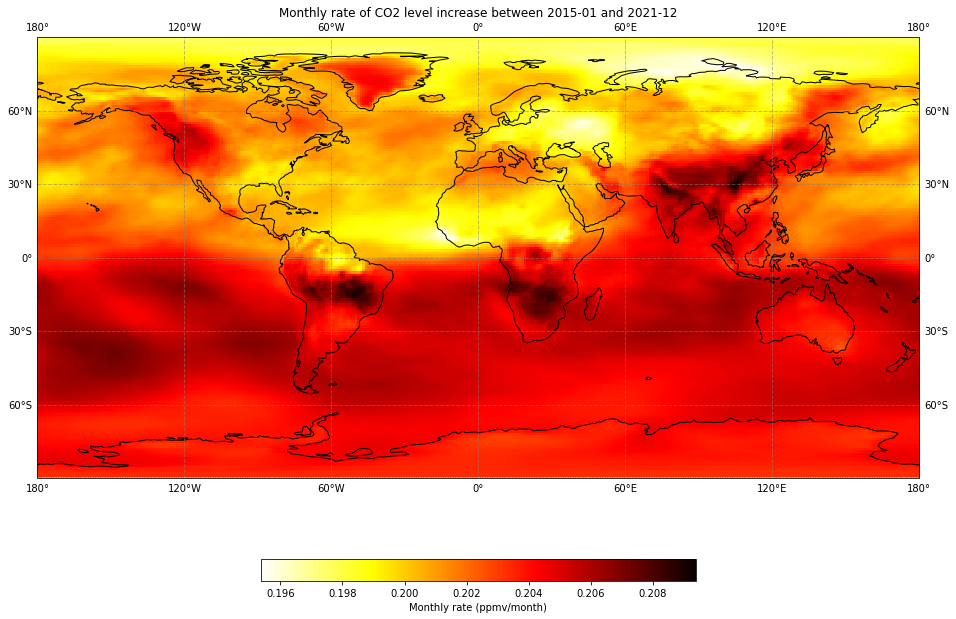

In [248]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.axes.add_feature(cf.COASTLINE)

out = co2_data['slope'].plot(ax=ax, add_colorbar=False, cmap='hot_r')
cb = plt.colorbar(out, fraction=0.04, orientation='horizontal')
cb.set_label("Monthly rate (ppmv/month)")
ax.set_aspect(1)
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=1, 
    color='gray', 
    alpha=0.5, 
    linestyle='--'
)
ax.set_title("Monthly rate of CO2 level increase between {:s} and {:s}".format(time_min, time_max))
plt.show()

We could also use other type of geographical data provide boundaries of countries using `geopandas`.

## Working with geographic boundaries using `geopandas`

Let's use `geopandas` and read in a `geojson` file. 

In [188]:
import geopandas as gpd
gdf_boundaries = gpd.read_file("./taking_the_pulse_atmosphere_data/world-administrative-boundaries.geojson")

In [189]:
country_names = np.sort(gdf_boundaries.name.values)
gdf_boundaries = gdf_boundaries.set_index('name')

In [191]:
# top10_countries

Use the below country name picker and pull out top 10 countries in `country_names`. 

In [192]:
widget_country = widgets.Select(options=country_names)
widget_country

Select(options=('Abyei', 'Afghanistan', 'Aksai Chin', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Ango…

In [193]:
widget_country.value

'Abyei'

In [194]:
names = [
    'China', 
    'United States of America', 
    'India', 
    'Russian Federation', 
    'Japan', 
    'Iran (Islamic Republic of)', 
    'Germany',
    'Republic of Korea',
    'Saudi Arabia',
    'Indonesia'
]

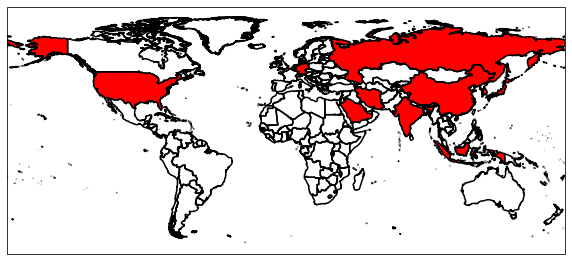

In [195]:
gdf_boundaries_top_10_co2 = gdf_boundaries.loc[names]
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
gdf_boundaries_top_10_co2.plot(ax=ax, color='r')
gdf_boundaries.boundary.plot(color='k', ax=ax)

We could color code the countries with some values. Let's calcalute the area of each county then plot it up. 

In [197]:
areas = [geom.area for geom in gdf_boundaries.geometry]

In [198]:
gdf_boundaries['area'] = areas

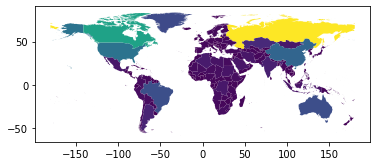

In [199]:
gdf_boundaries.plot(column='area', cmap='viridis')

## Homework Questions 

### Q1: Work with the CO2 time-series measured at Mauna Loa Observatory, calculate the mean CO2 values for each month, and plot the resulting values as a function of month; for CO2 values use the second column - "monthly_average_co2". **[Hint: use `groupby` operation]** Write relvant codes the below cell. What do you see in the plot? Describe the plot. Given what you have heard in class what are Possible causes of the seasonality?

In [ ]:
# Fill in this cell with codes to generate the plot
df_co2.groupby("month")['monthly_average_co2'].mean().plot()

Put your answer here. 

### Q2: Work with the same time-series, calculate the trend of CO2 (i.e. rate in ppmv/decade) within each decade strating from 1950 and eding 2020 using the `linear_fit` function, and plot the resulting rates as a function of starting year of the decade. Write relvant codes the below cell. Which decade show the largest CO2 increase?

2010-2020


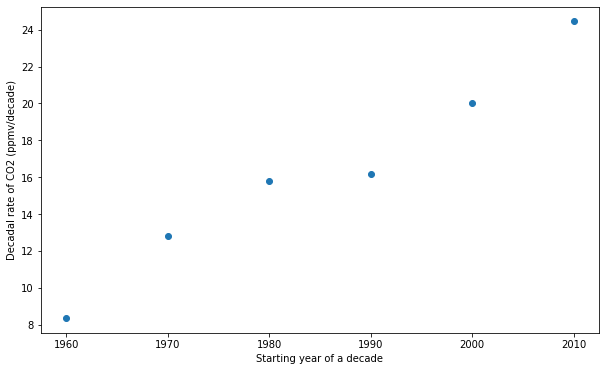

In [210]:
# Fill in this cell with codes to generate the plot
year_mins = np.array([1960, 1970, 1980, 1990, 2000, 2010])
year_maxs = year_mins + 10
slopes = np.zeros(len(year_mins), dtype=float)
for ii in range(len(year_mins)):
  year_min = year_mins[ii]
  year_max = year_maxs[ii]
  index_time = np.logical_and(year_min<time_series.year, year_max>=time_series.year)
  _, slope, _ = linear_fit(time_series[index_time], df_co2['monthly_average_co2'].values[index_time].reshape([-1,1]))
  slopes[ii] = slope * 12 * 10

# plot results
fig, ax = plt.subplots(1,1, figsize=(10, 6))
plt.plot(year_mins, slopes, 'o')
ax.set_xlabel("Starting year of a decade")
ax.set_ylabel("Decadal rate of CO2 (ppmv/decade)")

# the decade with the largest CO2 increase
print("{:d}-{:d}".format(year_mins[np.argmax(slopes)], year_maxs[np.argmax(slopes)]))

Put your answer here. 

### Q3: Working with the gridded CO2 data, calclulate the linear trend for the entire time span of the data, and plot the trend as a 2D map. Then in the same plot show the boundaries of the top 10 countries. Write relvant codes the below cell. Do you see strong correlation between the location of the top 10 countries and regions with a high CO2 rate? If so, explain the observed correlation. If not, explain you do not see the strong correlation. 

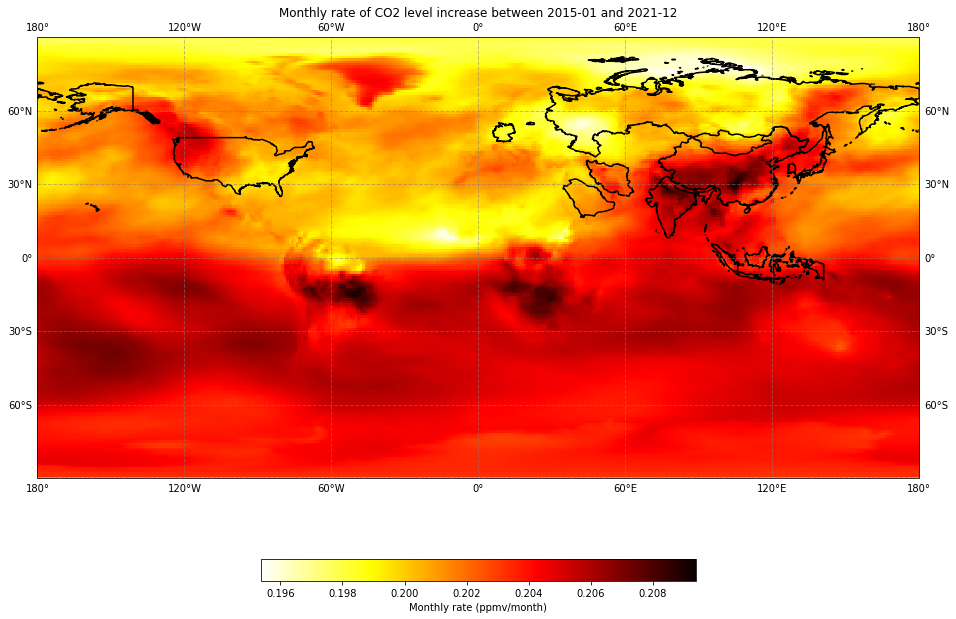

In [252]:
# Answer
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

out = co2_data['slope'].plot(ax=ax, add_colorbar=False, cmap='hot_r')
cb = plt.colorbar(out, fraction=0.04, orientation='horizontal')
cb.set_label("Monthly rate (ppmv/month)")
ax.set_aspect(1)
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=1, 
    color='gray', 
    alpha=0.5, 
    linestyle='--'
)
gdf_boundaries_top_10_co2.boundary.plot(ax=ax, color='k')
ax.set_title("Monthly rate of CO2 level increase between {:s} and {:s}".format(time_min, time_max))
ax.set_aspect(1)
plt.show()


Put your answer here. 

### Q4: Pick a gridded data set among three given below,  calculate the linear trend, plot the calculated trend on a 2D map. Using `cartopy`, add the coast line in the same map. 

- CH4: ./taking_the_pulse_atmosphere_data/ch4.nc
- NO2: ./taking_the_pulse_atmosphere_data/no2.nc
- CO: ./taking_the_pulse_atmosphere_data/co.nc

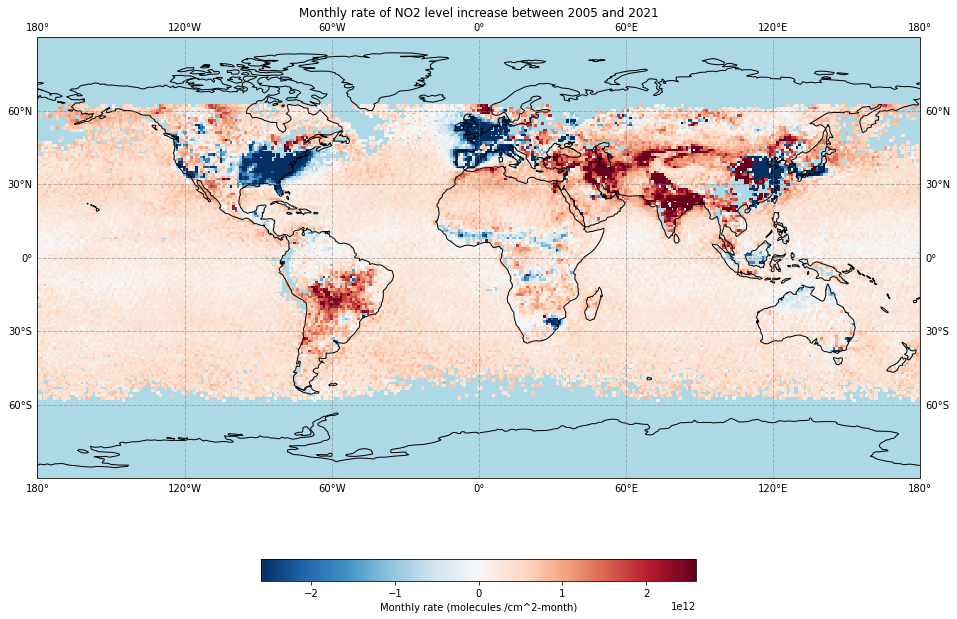

In [253]:
# Answer
no2_data = xr.load_dataset('./taking_the_pulse_atmosphere_data/no2.nc')

# Get no2 data as a numpy array, then reshape
no2_vec = no2_data.no2.data.reshape((no2_data.no2.data.shape[0], np.prod(no2_data.no2.data.shape[1:])))
time_series_no2 = pd.to_datetime(no2_data.time.data)
no2_linear_fit, slope, intercept = linear_fit(time_series_no2, no2_vec)

# Add resutls back to no2_data
no2_data['slope'] = (("lat", "lon"), slope.reshape(no2_data.no2.data.shape[1:]))
no2_data['intercept'] = (("lat", "lon"), intercept.reshape(no2_data.no2.data.shape[1:]))
no2_data['no2_linear_fit'] = (("time", "lat", "lon"), no2_linear_fit.reshape(no2_data.no2.data.shape))

year_min = pd.to_datetime(time_series_no2).min().strftime('%Y')
year_max = pd.to_datetime(time_series_no2).max().strftime('%Y')

values = no2_data['slope'].data.flatten()
values_active = values[~np.isnan(values)]
vmin, vmax = np.percentile(values_active, 1), np.percentile(values_active, 99)

fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.axes.add_feature(cf.COASTLINE)
out = no2_data['slope'].plot(ax=ax, add_colorbar=False, cmap='RdBu_r', vmin=-vmax, vmax=vmax)
cb = plt.colorbar(out, fraction=0.04, orientation='horizontal')
cb.set_label("Monthly rate (molecules /cm^2-month)")
ax.set_aspect(1)
ax.set_facecolor('lightblue')
ax.set_title("Monthly rate of NO2 level increase between {:s} and {:s}".format(year_min, year_max))
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=1, 
    color='gray', 
    alpha=0.5, 
    linestyle='--'
)

Put your answer here. 